In [1]:
%matplotlib notebook
%matplotlib inline
import pandas as pd
import os
import csv
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
#establishing path to the csv file
csvpath = os.path.join("Crimes_-_2001_to_Present-2.csv")
csvpath2 = os.path.join("clean_crime_df.csv")

#creating DataFrame of csv data
crime_df = pd.read_csv(csvpath)
clean_crime_df = pd.read_csv(csvpath2, parse_dates=True, index_col='Date')

#printing DataFrame info
crime_df.head()
clean_crime_df.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,12016034,JD193556,018XX N WINNEBAGO AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,1434,...,32.0,22.0,11,1160263.0,1912391.0,2020,03/26/2020 03:45:12 PM,41.915306,-87.686639,"(41.915306069, -87.686639247)"
2020-01-01,12220321,JD430436,091XX S DREXEL AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,413,...,8.0,47.0,17,1184157.0,1844395.0,2020,12/19/2020 03:45:59 PM,41.728192,-87.600985,"(41.728192429, -87.600985433)"
2020-01-01,12013828,JD191019,044XX S LAVERGNE AVE,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,False,814,...,22.0,56.0,02,1143770.0,1874726.0,2020,03/28/2020 03:47:02 PM,41.812274,-87.748177,"(41.81227369, -87.748176594)"
2020-01-01,12019692,JD197444,032XX N LINCOLN AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,1922,...,47.0,6.0,11,1164983.0,1921507.0,2020,04/01/2020 03:50:17 PM,41.940222,-87.669039,"(41.940221932, -87.669039008)"
2020-01-01,12036792,JD216459,072XX S WHIPPLE ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,831,...,18.0,66.0,11,1157290.0,1856526.0,2020,04/29/2020 03:53:17 PM,41.762067,-87.699077,"(41.762066981, -87.699077348)"


Find data with incomplete rows.

In [3]:
#counting number of entries for each column
crime_df.count()

ID                      418753
Case Number             418753
Date                    418753
Block                   418753
IUCR                    418753
Primary Type            418753
Description             418753
Location Description    416704
Arrest                  418753
Domestic                418753
Beat                    418753
District                418753
Ward                    418733
Community Area          418752
FBI Code                418753
X Coordinate            411430
Y Coordinate            411430
Year                    418753
Updated On              418753
Latitude                411430
Longitude               411430
Location                411430
dtype: int64

In [4]:
#drop all rows with missing information.
crime_df = crime_df.dropna(how='any')

#confirm new list
crime_df.count()

ID                      409763
Case Number             409763
Date                    409763
Block                   409763
IUCR                    409763
Primary Type            409763
Description             409763
Location Description    409763
Arrest                  409763
Domestic                409763
Beat                    409763
District                409763
Ward                    409763
Community Area          409763
FBI Code                409763
X Coordinate            409763
Y Coordinate            409763
Year                    409763
Updated On              409763
Latitude                409763
Longitude               409763
Location                409763
dtype: int64

Number of each type of crime.

In [5]:
#finding totals for each crime type
clean_crime_df["Primary Type"].value_counts()

BATTERY                              81731
THEFT                                79486
CRIMINAL DAMAGE                      49541
ASSAULT                              38462
DECEPTIVE PRACTICE                   30941
OTHER OFFENSE                        26034
MOTOR VEHICLE THEFT                  20385
WEAPONS VIOLATION                    17361
ROBBERY                              15749
BURGLARY                             15317
NARCOTICS                            11358
CRIMINAL TRESPASS                     7528
OFFENSE INVOLVING CHILDREN            3629
CRIMINAL SEXUAL ASSAULT               2487
SEX OFFENSE                           1914
PUBLIC PEACE VIOLATION                1861
HOMICIDE                              1601
ARSON                                 1111
INTERFERENCE WITH PUBLIC OFFICER       968
STALKING                               552
PROSTITUTION                           370
LIQUOR LAW VIOLATION                   323
CONCEALED CARRY LICENSE VIOLATION      317
INTIMIDATIO

In [6]:
#grouping by crime type
crime_type = clean_crime_df.groupby("Primary Type")
count_crime_types = crime_type["Primary Type"].count()
count_crime_types

Primary Type
ARSON                                 1111
ASSAULT                              38462
BATTERY                              81731
BURGLARY                             15317
CONCEALED CARRY LICENSE VIOLATION      317
CRIM SEXUAL ASSAULT                     75
CRIMINAL DAMAGE                      49541
CRIMINAL SEXUAL ASSAULT               2487
CRIMINAL TRESPASS                     7528
DECEPTIVE PRACTICE                   30941
GAMBLING                                38
HOMICIDE                              1601
HUMAN TRAFFICKING                       17
INTERFERENCE WITH PUBLIC OFFICER       968
INTIMIDATION                           278
KIDNAPPING                             205
LIQUOR LAW VIOLATION                   323
MOTOR VEHICLE THEFT                  20385
NARCOTICS                            11358
NON-CRIMINAL                             5
OBSCENITY                               97
OFFENSE INVOLVING CHILDREN            3629
OTHER NARCOTIC VIOLATION                 

In [7]:
crime_type = clean_crime_df.groupby("Primary Type")
count_crime_types = crime_type["Primary Type"].count()

total_crimetype_df = pd.DataFrame({"Crime Type": count_crime_types})
# total_crimetype_df

#sorting crime totals in decending order and only focusing on the top 10
top_ten_crimes = total_crimetype_df.sort_values(by = ['Crime Type'], ascending = False)[:10]

top_ten_crimes.reset_index()

# print(top_ten_crimes)

,Primary Type,Crime Type
0,BATTERY,81731
1,THEFT,79486
2,CRIMINAL DAMAGE,49541
3,ASSAULT,38462
4,DECEPTIVE PRACTICE,30941
5,OTHER OFFENSE,26034
6,MOTOR VEHICLE THEFT,20385
7,WEAPONS VIOLATION,17361
8,ROBBERY,15749
9,BURGLARY,15317


In [8]:
#obtaining the total for the top ten crimes
top_ten_crimes_sum = total_crimetype_df.sort_values(by = ['Crime Type'], ascending = False).head(10)
top_ten_crimes_sum = top_ten_crimes_sum.sum()
top_ten_crimes_sum

Crime Type    375007
dtype: int64

In [9]:
#obtaining the total for the remaining crimes
bottom_twentythree_crimes_sum = total_crimetype_df.sort_values(by = ['Crime Type'], ascending = True).head(23)
bottom_twentythree_crimes_sum = bottom_twentythree_crimes_sum.sum()
bottom_twentythree_crimes_sum

Crime Type    34756
dtype: int64

In [10]:
#creating labels and values for pie chart from data above
labels = ["Top Ten Crimes", "All Other Crimes"]
crimes = [375007, 34756]

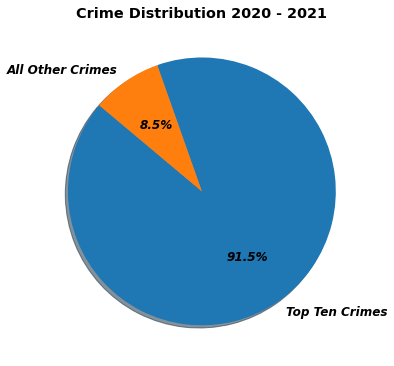

In [11]:
#creating pie graph with formatting
fig = plt.figure()
fig.set_figheight(25)
text_prop = {'family':'sans-serif', 'fontsize':'large', 
             'fontstyle':'italic', 'fontweight':'heavy'}
plt.pie(crimes, labels=labels, autopct="%1.1f%%", textprops=text_prop, shadow=True, startangle=140)
plt.title('Crime Distribution 2020 - 2021',fontweight='bold', fontsize='x-large')
plt.savefig("Crime_Distribution_2020-2021.png")
plt.show()

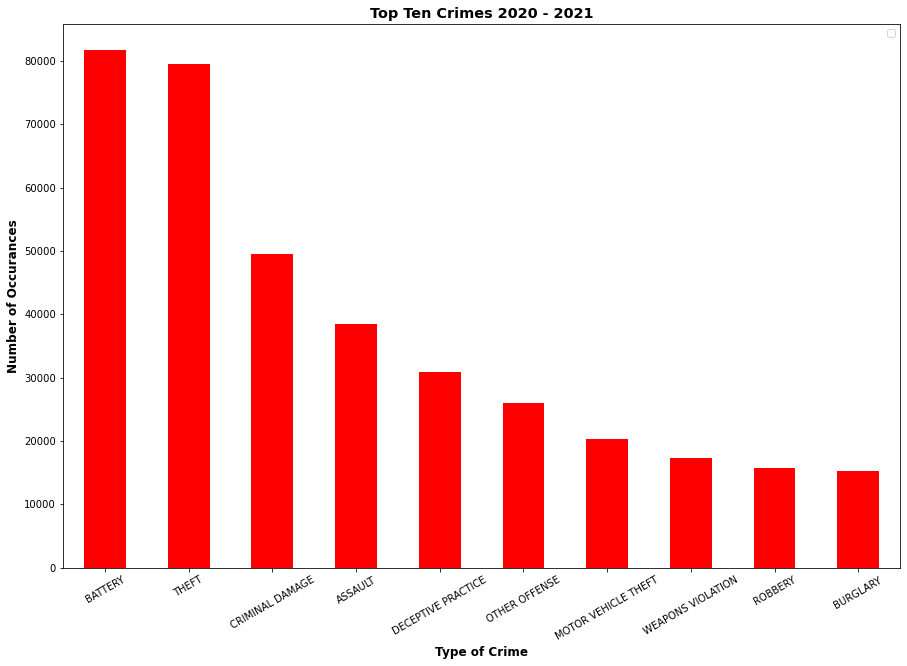

<Figure size 432x288 with 0 Axes>

In [12]:
#creating bar graph of the top 10 crimes
top_ten_crime_chart = top_ten_crimes.plot(kind='bar', figsize = (15, 10), color=["r"], )

top_ten_crime_chart.set_xlabel("Type of Crime", fontweight='bold', fontsize='large')
top_ten_crime_chart.set_ylabel("Number of Occurances", fontweight='bold', fontsize='large')
top_ten_crime_chart.legend("")
plt.title("Top Ten Crimes 2020 - 2021", fontweight='bold', fontsize='x-large')
plt.xticks(rotation=30, horizontalalignment="center")

plt.savefig("Top_Ten_Crimes_2020-2021.png")
plt.show()
plt.tight_layout()


In [13]:
#separating data by date range of Jan. 1, 2020 through Dec. 31, 2020
crime_2020_df = clean_crime_df.loc['2020-01-01':'2020-12-31']
crime_2020_df

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,12016034,JD193556,018XX N WINNEBAGO AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,1434,...,32.0,22.0,11,1160263.0,1912391.0,2020,03/26/2020 03:45:12 PM,41.915306,-87.686639,"(41.915306069, -87.686639247)"
2020-01-01 00:00:00,12220321,JD430436,091XX S DREXEL AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,413,...,8.0,47.0,17,1184157.0,1844395.0,2020,12/19/2020 03:45:59 PM,41.728192,-87.600985,"(41.728192429, -87.600985433)"
2020-01-01 00:00:00,12013828,JD191019,044XX S LAVERGNE AVE,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,False,814,...,22.0,56.0,02,1143770.0,1874726.0,2020,03/28/2020 03:47:02 PM,41.812274,-87.748177,"(41.81227369, -87.748176594)"
2020-01-01 00:00:00,12019692,JD197444,032XX N LINCOLN AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,1922,...,47.0,6.0,11,1164983.0,1921507.0,2020,04/01/2020 03:50:17 PM,41.940222,-87.669039,"(41.940221932, -87.669039008)"
2020-01-01 00:00:00,12036792,JD216459,072XX S WHIPPLE ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,831,...,18.0,66.0,11,1157290.0,1856526.0,2020,04/29/2020 03:53:17 PM,41.762067,-87.699077,"(41.762066981, -87.699077348)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 23:45:00,12259610,JE101232,002XX E MARQUETTE RD,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,322,...,6.0,69.0,14,1178930.0,1860641.0,2020,01/07/2021 03:51:50 PM,41.772894,-87.619639,"(41.772893757, -87.619639151)"
2020-12-31 23:45:00,12263896,JE105660,049XX S FORRESTVILLE AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,223,...,4.0,38.0,06,1180760.0,1872402.0,2020,01/10/2021 03:48:54 PM,41.805125,-87.612569,"(41.805125154, -87.612569477)"
2020-12-31 23:45:00,12274737,JE118886,001XX E WACKER DR,0810,THEFT,OVER $500,HOTEL / MOTEL,False,False,114,...,42.0,32.0,06,1177683.0,1902638.0,2020,01/23/2021 03:52:14 PM,41.888165,-87.622937,"(41.888165132, -87.622937212)"


In [14]:
#sorting data by crime and setting the total in decending order
crime_type_2020 = crime_2020_df.groupby("Primary Type")
count_2020_crime_types = crime_type_2020["Primary Type"].count()
# count_2020_crime_types

total_2020_crimetype_df = pd.DataFrame({"Crime Type": count_2020_crime_types})
total_2020_crimetype_df

top_ten_2020_crimes = total_2020_crimetype_df.sort_values(by = ['Crime Type'], ascending = False)[:10]

top_ten_2020_crimes.reset_index()

,Primary Type,Crime Type
0,BATTERY,41411
1,THEFT,40224
2,CRIMINAL DAMAGE,24695
3,ASSAULT,18206
4,DECEPTIVE PRACTICE,15904
5,OTHER OFFENSE,12396
6,MOTOR VEHICLE THEFT,9896
7,BURGLARY,8704
8,WEAPONS VIOLATION,8416
9,ROBBERY,7847


In [15]:
#separating data by date range of Jan. 1, 2021 through Dec. 31, 2021
crime_2021_df = clean_crime_df.loc['2021-01-01':'2021-12-31']
crime_2021_df

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,12259646,JE101358,087XX S COTTAGE GROVE AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,632,...,8.0,44.0,06,1183088.0,1847314.0,2021,01/16/2021 03:49:23 PM,41.736227,-87.604811,"(41.73622739, -87.604810841)"
2021-01-01 00:00:00,12259424,JE100501,062XX S MICHIGAN AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,311,...,20.0,40.0,14,1178263.0,1863570.0,2021,01/16/2021 03:49:23 PM,41.780946,-87.621995,"(41.780946398, -87.621995369)"
2021-01-01 00:00:00,12259264,JE100537,062XX S COTTAGE GROVE AVE,0420,BATTERY,AGGRAVATED - KNIFE / CUTTING INSTRUMENT,APARTMENT,False,False,313,...,20.0,42.0,04B,1182638.0,1863733.0,2021,01/16/2021 03:49:23 PM,41.781293,-87.605951,"(41.781293251, -87.60595085)"
2021-01-01 00:00:00,12258861,JE100369,016XX N CICERO AVE,051A,ASSAULT,AGGRAVATED - HANDGUN,ALLEY,False,False,2533,...,37.0,25.0,04A,1144145.0,1910673.0,2021,01/16/2021 03:49:23 PM,41.910910,-87.745899,"(41.910909931, -87.745898897)"
2021-01-01 00:00:00,12259020,JE100698,075XX S JEFFERY BLVD,141B,WEAPONS VIOLATION,UNLAWFUL USE - OTHER FIREARM,STREET,False,False,414,...,8.0,43.0,15,1190847.0,1855361.0,2021,01/16/2021 03:49:23 PM,41.758125,-87.576126,"(41.758125331, -87.576125553)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 23:50:00,12582027,JF100292,051XX S SPAULDING AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,False,822,...,14.0,63.0,08A,1155247.0,1870367.0,2021,01/07/2022 03:47:10 PM,41.800090,-87.706195,"(41.800089835, -87.706195287)"
2021-12-31 23:50:00,12581975,JF100045,068XX S CHAMPLAIN AVE,1365,CRIMINAL TRESPASS,TO RESIDENCE,APARTMENT,False,False,321,...,20.0,42.0,26,1181741.0,1859870.0,2021,01/07/2022 03:47:10 PM,41.770714,-87.609359,"(41.770713582, -87.609358643)"
2021-12-31 23:55:00,12584234,JF102969,087XX S WOOD ST,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,2221,...,21.0,71.0,14,1165870.0,1846697.0,2021,01/07/2022 03:47:10 PM,41.734917,-87.667909,"(41.734916889, -87.66790905)"


In [16]:
#sorting data by crime and setting the total in decending order
crime_type_2021 = crime_2021_df.groupby("Primary Type")
count_2021_crime_types = crime_type_2021["Primary Type"].count()
# count_2020_crime_types

total_2021_crimetype_df = pd.DataFrame({"Crime Type": count_2021_crime_types})
total_2021_crimetype_df

top_ten_2021_crimes = total_2021_crimetype_df.sort_values(by = ['Crime Type'], ascending = False)[:10]

top_ten_2021_crimes.reset_index()

,Primary Type,Crime Type
0,BATTERY,40320
1,THEFT,39262
2,CRIMINAL DAMAGE,24846
3,ASSAULT,20256
4,DECEPTIVE PRACTICE,15037
5,OTHER OFFENSE,13638
6,MOTOR VEHICLE THEFT,10489
7,WEAPONS VIOLATION,8945
8,ROBBERY,7902
9,BURGLARY,6613
